In [1]:
import os
from itertools import permutations

import pandas as pd
import numpy as np

import cv2

import matplotlib.pyplot as plt

In [2]:
import albumentations as A
def train_get_transforms():
    return A.Compose([
            A.Resize(256, 256),
    ])
transform = train_get_transforms()
# img = transform(image=img)['image']

In [3]:
for i in range(1, 10):
    
    paths = '../data/train_dataset/BC/'#BC_03/
    paths = paths + 'BC_' + str(i).zfill(2) + '/'

    img_paths = os.listdir(paths)
    for img_path in img_paths:
        img_path = paths+img_path
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        # crop
        # img = img[:2400, 500:2800, :]
        
        # resize
        img = transform(image=img)['image']
        
        # save crop img
        img_path = img_path.replace('/BC/', '/BC_adjust/')
        os.makedirs('/'.join(img_path.split('/')[:-1]), exist_ok=True)
        cv2.imwrite(img_path, img)
        
        # print(img.shape)
        # break
    # plt.imshow(img[:2400, 500:2800, :])
    # plt.show()

In [4]:
for i in range(1, 11):
    
    paths = '../data/train_dataset/LT/'#BC_03/
    paths = paths + 'LT_' + str(i).zfill(2) + '/'

    img_paths = os.listdir(paths)
    for img_path in img_paths:
        img_path = paths+img_path
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        # crop
        # img = img[:2400, 500:2800, :]
        
        # resize
        img = transform(image=img)['image']
        
        # save crop img
        img_path = img_path.replace('/LT/', '/LT_adjust/')
        os.makedirs('/'.join(img_path.split('/')[:-1]), exist_ok=True)
        cv2.imwrite(img_path, img)

In [5]:
for i in [1088, 1100, 1112]:
    
    paths = '../data/test_dataset/BC/'#BC_03/
    paths = paths + str(i) + '/'

    img_paths = os.listdir(paths)
    for img_path in img_paths:
        img_path = paths+img_path
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        # crop
        # img = img[:2400, 500:2800, :]
        
        # resize
        img = transform(image=img)['image']
        
        # save crop img
        img_path = img_path.replace('/BC/', '/BC_adjust/')
        os.makedirs('/'.join(img_path.split('/')[:-1]), exist_ok=True)
        cv2.imwrite(img_path, img)

In [6]:
for i in [1003, 1088, 1089]:
    
    paths = '../data/test_dataset/LT/'#BC_03/
    paths = paths + str(i) + '/'

    img_paths = os.listdir(paths)
    for img_path in img_paths:
        img_path = paths+img_path
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        # crop
        # img = img[:2400, 500:2800, :]
        
        # resize
        img = transform(image=img)['image']
        
        # save crop img
        img_path = img_path.replace('/LT/', '/LT_adjust/')
        os.makedirs('/'.join(img_path.split('/')[:-1]), exist_ok=True)
        cv2.imwrite(img_path, img)

In [ ]:
img_paths = '../data/train_dataset/BC_adjust/BC_01/'

[img_paths+p for p in os.listdir(img_paths)]

In [5]:
train = pd.DataFrame()
for i in range(1, 10):
    
    paths = '../data/train_dataset/BC_adjust/'
    paths = paths + 'BC_' + str(i).zfill(2) + '/'

    temp = pd.DataFrame()
    temp['file_path'] = [p for p in os.listdir(paths) if 'resize' not in p]
    temp['file_path'] = paths + temp['file_path']

    a = pd.DataFrame(list(permutations(temp['file_path'], 2)))
    a = a[a[0].apply(lambda x: x[-6:-4]).astype(int) < a[1].apply(lambda x: x[-6:-4]).astype(int)]
    a['time_delta'] = a[1].apply(lambda x: x[-6:-4]).astype(int) - a[0].apply(lambda x: x[-6:-4]).astype(int)
    a.columns = ['before_file_path', 'after_file_path', 'time_delta']
    
    train = train.append(a).reset_index(drop=True)
    
for i in range(1, 11):
    
    paths = '../data/train_dataset/LT_adjust/'
    paths = paths + 'LT_' + str(i).zfill(2) + '/'

    temp = pd.DataFrame()
    temp['file_path'] = [p for p in os.listdir(paths) if 'resize' not in p]
    temp['file_path'] = paths + temp['file_path']
    
    a = pd.DataFrame(list(permutations(temp['file_path'], 2)))
    a = a[a[0].apply(lambda x: x[-6:-4]).astype(int) < a[1].apply(lambda x: x[-6:-4]).astype(int)]
    a['time_delta'] = a[1].apply(lambda x: x[-6:-4]).astype(int) - a[0].apply(lambda x: x[-6:-4]).astype(int)
    a.columns = ['before_file_path', 'after_file_path', 'time_delta']
    
    train = train.append(a).reset_index(drop=True)

In [6]:
train.to_csv('../data/train.csv', index=False)

In [ ]:
# add resize image

In [ ]:
train = pd.read_csv('../data/train.csv')

In [ ]:
import albumentations as A
def train_get_transforms():
    return A.Compose([
            A.Resize(256, 256),
    ])
transform = train_get_transforms()

In [ ]:
for img_path in pd.concat([train['before_file_path'], train['after_file_path']]).unique():
    img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
    img = transform(image=img)['image']
    img_path = img_path.replace('.png', '_resize256.png')
    cv2.imwrite(img_path, img)

In [ ]:
test = pd.read_csv('../data/test_dataset/test_data.csv')
test['before_file_path'] = test['before_file_path'].apply(lambda x: '../data/test_dataset/' + x.split('_')[1] + '_adjust/' + x.split('_')[2] + '/' + x + '.png')
test['after_file_path'] = test['after_file_path'].apply(lambda x: '../data/test_dataset/' + x.split('_')[1] + '_adjust/' + x.split('_')[2] + '/' + x + '.png')

In [ ]:
import albumentations as A
def train_get_transforms():
    return A.Compose([
            A.Resize(256, 256),
    ])
transform = train_get_transforms()

In [ ]:
for img_path in pd.concat([test['before_file_path'], test['after_file_path']]).unique():
    img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
    img = transform(image=img)['image']
    img_path = img_path.replace('.png', '_resize256.png')
    cv2.imwrite(img_path, img)

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test_dataset/test_data.csv')

train['type'] = train['before_file_path'].apply(lambda x: 'BC' if 'BC' in x else 'LT')

In [6]:
(train['time_delta']//4).unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [13]:
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold
# skf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=42)
skf = GroupKFold(n_splits=9)

In [11]:
train1 = train[train['type']=='BC'].reset_index(drop=True)
train2 = train[train['type']=='LT'].reset_index(drop=True)

In [19]:
train1['splits'] = train1['before_file_path'].apply(lambda x: x.split('adjust/')[-1][:5])# + '_' + train['time_delta'].astype(str)
n_splits = list(skf.split(train1, y=train1['time_delta'], groups=train1['splits']))

In [22]:
train2['splits'] = train2['before_file_path'].apply(lambda x: x.split('adjust/')[-1][:5])# + '_' + train['time_delta'].astype(str)
n_splits2 = list(skf.split(train2, y=train2['time_delta'], groups=train2['splits']))

In [25]:
pd.concat([train1.loc[n_splits[0][0]], train2.loc[n_splits[0][0]]]).reset_index(drop=True)

,before_file_path,after_file_path,time_delta,type,splits
0,../data/train_dataset/BC_adjust/BC_01/DAT01.png,../data/train_dataset/BC_adjust/BC_01/DAT02.png,1,BC,BC_01
1,../data/train_dataset/BC_adjust/BC_01/DAT01.png,../data/train_dataset/BC_adjust/BC_01/DAT03.png,2,BC,BC_01
2,../data/train_dataset/BC_adjust/BC_01/DAT01.png,../data/train_dataset/BC_adjust/BC_01/DAT04.png,3,BC,BC_01
3,../data/train_dataset/BC_adjust/BC_01/DAT01.png,../data/train_dataset/BC_adjust/BC_01/DAT05.png,4,BC,BC_01
4,../data/train_dataset/BC_adjust/BC_01/DAT01.png,../data/train_dataset/BC_adjust/BC_01/DAT06.png,5,BC,BC_01
...,...,...,...,...,...
11129,../data/train_dataset/LT_adjust/LT_09/DAT06.png,../data/train_dataset/LT_adjust/LT_09/DAT12.png,6,LT,LT_09
11130,../data/train_dataset/LT_adjust/LT_09/DAT06.png,../data/train_dataset/LT_adjust/LT_09/DAT13.png,7,LT,LT_09
11131,../data/train_dataset/LT_adjust/LT_09/DAT06.png,../data/train_dataset/LT_adjust/LT_09/DAT14.png,8,LT,LT_09
11132,../data/train_dataset/LT_adjust/LT_09/DAT06.png,../data/train_dataset/LT_adjust/LT_09/DAT15.png,9,LT,LT_09


In [ ]:
train1['splits'] = train1['before_file_path'].apply(lambda x: x.split('adjust/')[-1][:5])# + '_' + train['time_delta'].astype(str)
n_splits = list(skf.split(train1, y=train1['time_delta'], groups=train1['splits']))
for i,j in n_splits:
    print(train1.loc[i].splits.apply(lambda x: x[:5]).value_counts())
    print(train1.loc[j].splits.apply(lambda x: x[:5]).value_counts())
    
    print('#'*100)

In [ ]:
train2['splits'] = train2['before_file_path'].apply(lambda x: x.split('adjust/')[-1][:5])# + '_' + train['time_delta'].astype(str)
n_splits = list(skf.split(train2, y=train2['time_delta'], groups=train2['splits']))
for i,j in n_splits:
    print(train2.loc[i].splits.apply(lambda x: x[:5]).value_counts())
    print(train2.loc[j].splits.apply(lambda x: x[:5]).value_counts())
    
    print('#'*100)

In [5]:
# train['splits'] = train['before_file_path'].apply(lambda x: x.split('adjust/')[1][:5])
train['splits'] = train['before_file_path'].apply(lambda x: x.split('adjust/')[-1][:5])# + '_' + train['time_delta'].astype(str)
# train = train[~train['splits'].isin(['BC_03', 'BC_04'])].reset_index(drop=True)
list(skf.split(train, y=train['time_delta'], groups=train['splits']))

[(array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([2341, 2342, 2343, ..., 6374, 6375, 6376])),
 (array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([4844, 4845, 4846, ..., 6809, 6810, 6811])),
 (array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([ 3244,  3245,  3246, ..., 13050, 13051, 13052])),
 (array([  741,   742,   743, ..., 13830, 13831, 13832]),
  array([   0,    1,    2, ..., 2338, 2339, 2340])),
 (array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([ 4024,  4025,  4026, ..., 11450, 11451, 11452])),
 (array([    0,     1,     2, ..., 13050, 13051, 13052]),
  array([ 9152,  9153,  9154, ..., 13830, 13831, 13832])),
 (array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([ 8372,  8373,  8374, ..., 12230, 12231, 12232])),
 (array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([ 741,  742,  743, ..., 8369, 8370, 8371])),
 (array([    0,     1,     2, ..., 13830, 13831, 13832]),
  array([ 6812,  6813,  6814, 

In [6]:
for i,j in list(skf.split(train, y=train['time_delta'], groups=train['splits'])):
    print(train.loc[i].splits.apply(lambda x: x[:5]).value_counts())
    print(train.loc[j].splits.apply(lambda x: x[:5]).value_counts())
    
    print('#'*100)

BC_07    903
BC_03    820
BC_06    820
LT_08    820
BC_02    780
BC_05    780
LT_01    780
LT_02    780
LT_03    780
LT_04    780
LT_05    780
LT_07    780
LT_09    780
BC_01    741
LT_06    741
BC_09    435
Name: splits, dtype: int64
BC_04    903
BC_08    630
Name: splits, dtype: int64
####################################################################################################
BC_04    903
BC_03    820
BC_06    820
LT_08    820
BC_02    780
BC_05    780
LT_01    780
LT_02    780
LT_03    780
LT_04    780
LT_05    780
LT_07    780
LT_09    780
BC_01    741
LT_06    741
BC_08    630
Name: splits, dtype: int64
BC_07    903
BC_09    435
Name: splits, dtype: int64
####################################################################################################
BC_04    903
BC_07    903
BC_03    820
BC_06    820
BC_02    780
LT_01    780
LT_02    780
LT_03    780
LT_04    780
LT_05    780
LT_07    780
LT_09    780
BC_01    741
LT_06    741
BC_08    630
BC_09    435
Name: splits, 

In [1]:
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

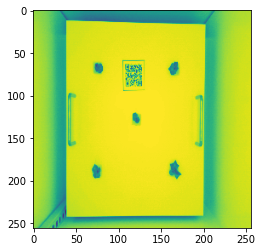

In [3]:
img = cv2.imread('../data/train_dataset/LT_adjust/LT_09/DAT08.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

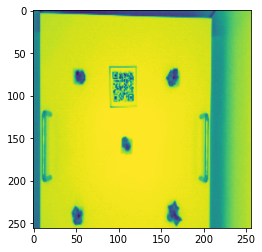

In [294]:
def transforms():
    return A.Compose([
            A.Resize(random.randint(256, 256+128), random.randint(256, 256+128)),
            # A.Resize(config.img_size, config.img_size),
            A.RandomCrop(256, 256)
            # A.crops.transforms.CenterCrop(256, 256, p=1.0),
            # A.RandomCrop(256, 256),
            # A.Cutout(max_h_size=int(256 * 0.5), max_w_size=int(256 * 0.5), num_holes=1, p=0.8)
            # RandomAugMix(severity=3, width=3, alpha=1.0, p=1.0),
            # ToTensorV2()
    ])
trans = transforms()
img2 = trans(image=img)['image']
plt.imshow(img2)

In [ ]:
def random_crop(img, img2):
    h_size = int(img.shape[0]/2)
    seed = np.random.rand()
    if seed<0.2:
        img = img[:h_size, :h_size]
        img2 = img2[:h_size, :h_size]
    elif 0.2<=seed<0.4:
        img = img[:h_size, h_size:]
        img2 = img2[:h_size, h_size:]
    elif 0.4<=seed<0.6:
        img = img[h_size:, :h_size]
        img2 = img2[h_size:, :h_size]
    elif 0.6<=seed<0.8:
        img = img[h_size:, h_size:]
        img2 = img2[h_size:, h_size:]
    elif 0.8<=seed:
        img = img[int(h_size/2):int(h_size/2*3), int(h_size/2):int(h_size/2*3)]
        img2 = img2[int(h_size/2):int(h_size/2*3), int(h_size/2):int(h_size/2*3)]
    return img, img2

In [ ]:
random_crop(img, img)[0].shape

In [ ]:
256/2/2

In [ ]:
plt.imshow(img[64:64*3, 64:64*3])